In [27]:
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib.patches import Patch

# Load data set csv
df = pd.read_csv("./dataset/Social Science A.csv")
# df.set_index('NO ABSEN', inplace=True)
df

,Timestamp,Email Address,NAMA LENGKAP,NO ABSEN,KELAS,1. Teman anda yang paling anda sukai di kelas,Alasan,2. Teman anda yang paling anda sukai di kelas,ALASAN,1. Teman anda yang paling anda tidak sukai di kelas,ALASAN.1,2. Teman anda yang paling anda tidak sukai di kelas,ALASAN.2
0,5/3/2023 19:42:22,cokratu2010@gmail.com,Cokorda Istri Ratu Giriningrum,1,VIIA,Ni Made Mia Sukmawati,Karena paling nyaman di ajak curhat,Ni Made Mia Sukmawati,Paling nyaman di ajak curhat,I Dewa Ketut Widhisandhyka Premana,Sering mengganggu saat jam pelajaran,I Dewa Ketut Widhisandhyka Premana,Kadang mengganggu saat jam pelajaran
1,5/3/2023 15:20:48,anugrahwidiantari@gmail.com,I Dewa Gede Satria Wibawa,2,VIIA,I Dewa Ketut Widhisandhyka Premana,Baik hati,Ida Ayu Gde Freya Jacinda Ganya M.,Murah senyum,I Putu Reva Adi Saputra,Suka mengejek nama ortu,I Gede Pratama,Suka mengejek nama ortu
2,5/3/2023 17:41:53,idewaketutwidhisandhyka@gmail.com,I Dewa Ketut Widhisandhyka Premana,3,VIIA,I Komang Trisna Adi Maha Pratama,Karena orangnya bisa diajak bercanda mau di ke...,I Gede Pratama,Bisa diajak berkomunikasi lebih dekat,Ni Putu Eca Masyuni,Karena sering di gosipin,Ni Made Cempaka Dwi Arsikasari,Sering melirik dengan lirikan seperti membenci
3,5/3/2023 17:47:33,madebaskara2020@gmail.com,I Dewa Made Baskara Putradana,4,VIIA,I Gede Candra Winata,"dia baik sering mebantu saya saat kesusahan, d...",I Gede Candra Winata,"dia baik sering membatu saya saat kesusahan, d...",I Kadek Suartana Kencana,Tidak ada,Ni Komang Mira Kurnia Lestari,Tidak ada
4,5/3/2023 19:49:54,pangkywayan@gmail.com,I Gede Candra Winata,5,VIIA,I Gede Pratama,Karena Pratama adalah teman ngobrol saya yang ...,I Dewa Made Baskara Putradana,Karena Dewa Baskara sangat baik dan Dewa Baska...,I Komang Wahyu Premana Putra,Karena wahyu tidak bisa diajak bercanda,I Kadek Suartana Kencana,Karena Kadek Suartana selalu mengejek nama ora...
5,5/16/2023 18:56:55,putu09ama@gmail.com,I Gede Pratama,6,VIIA,I Dewa Gede Satria Wibawa,"Karena dia lucu dan seru kalo di ajk ngobrol, ...",I Komang Trisna Adi Maha Pratama,Karena dia teman saya dari KLS 3 SD dan dia ju...,I Nyoman Rio Budi Saputra Wijaya,"Dia tu jutek dan pilih pilih klo nyari temen, ...",I Komang Wahyu Premana Putra,Dia orang nya pemarah trus sering mukull kepal...
6,6/7/2023 21:17:56,nikomangsulastriasih@gmail.com,I Kadek Agus Dwiananda,7,VIIA,I Wayan Yudista,karena orangnya asik,Made Anasuya Sw,karena orangnya lucu,I Nyoman Rio Budi Saputra Wijaya,karena suka pilih-pilih teman,I Dewa Made Baskara Putradana,karena suka mengadu
7,5/5/2023 10:33:47,ikadekrehandwipermana265@gmail.com,I Kadek Rehan Dwi Permana,8,VIIA,I Komang Wahyu Premana Putra,Karena orangnya baik,I Putu Adrian Satya Kusuma,Karena baik,I Kadek Suartana Kencana,Sering mengejek nama orang tua,I Putu Reva Adi Saputra,Sering mengejek nama orangtua
8,5/3/2023 20:45:09,dekyo47@gmail.com,I Kadek Rio Sukma Adi,9,VIIA,Made Anasuya Sw,"karna bestii, anjayy",I Wayan Yudista,"karna bestiiii,anjayy",Ni Made Cempaka Dwi Arsikasari,karna campah pada guru,I Putu Reva Adi Saputra,karna wibuuuu
9,5/4/2023 18:43:15,kadeksuartana1711@gmail.com,I Kadek Suartana Kencana,10,VIIA,I Komang Trisna Adi Maha Pratama,Orang nya seru kalau di ajak ngobrol,I Putu Adrian Satya Kusuma,Orang nya seru kalau di ajak ngobrol,Ni Putu Eca Masyuni,suka nyebut nama bapak saya,I Komang Wahyu Premana Putra,Suka marah kalau diajak bercanda


In [3]:
# Menginisiasi grafik dari library networkx
G = nx.Graph()

# Membuat perulangan grafik dengan variable G dan data yang sebelumnya di load
for _, row in df.iterrows():
    G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda sukai di kelas'], relation='disukai')
    G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda tidak sukai di kelas'], relation='disukai')

# Membuat list dari data set sebelumnya dengan mengambil 2 column
X = np.array(df[['Alasan', 'ALASAN.1']])

# Membuat variable untuk digunakan dalam KMeans
n_clusters = 2

# Membuat variable dari KMeans dan menggunakan variable sebelumnya sebagai attribute
kmeans = KMeans(n_clusters)

# Membuat variable baru yang bertujuan untuk membuat column baru pada dataset den prediksi dengan metode convenience
df['cluster'] = kmeans.fit_predict(X)

# Pemetaan warna untuk nantinya digunakan dalam grafik
color_map = {0: 'red', 1: 'blue'}
node_colors = [color_map[c] for c in df['cluster']]

# Membuat tampilan untuk grafik yang tadinya telah disiapkan melalui variable G dan variable lainnya
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=10, font_weight='bold')
plt.show()


ValueError: could not convert string to float: 'Karena paling nyaman di ajak curhat '

In [1]:
# Menginisiasi grafik dari library networkx
G = nx.Graph()
# G_nd = nx.dodecahedral_graph()

# Membuat perulangan grafik dengan variable G dan data yang sebelumnya di load
for _, row in df.iterrows():
    node_name = 'siswa' + str(row['NO ABSEN'])
    G.add_node(node_name, alasan_disukai=row['Alasan'], alasan_tidak_disukai=row['ALASAN.1'], label=row['NAMA LENGKAP'])

# Menyipan deklarasi value dari beberapa column dataset ke dalam variable
liked_reason = df['Alasan'].values
hated_reason = df['ALASAN.1'].values

# inisialisasi function CountVectorizer untuk teks ke sebuah matrix perhitungan token
vectorized = CountVectorizer()

# Melakukan tranformasi data dari 2 variable sebelum menjadi 2 buah list baru
X_liked = vectorized.fit_transform(liked_reason).toarray()
X_hated = vectorized.fit_transform(hated_reason).toarray()

# Menyipan kombinasi dari ke 2 varibale ke dalam variable baru
X_combined = np.hstack((X_liked, X_hated))

# Membuat variable untuk digunakan dalam KMeans
n_clusters = 2

# Membuat variable dari KMeans dan menggunakan variable sebelumnya sebagai attribute
kmeans = KMeans(n_clusters, n_init=10)

# Membuat variable baru yang bertujuan untuk membuat column baru pada dataset den prediksi dengan metode convenience
df['cluster'] = kmeans.fit_predict(X_combined)


# Pemetaan warna untuk nantinya digunakan dalam grafik
color_map = {0: 'red', 1: 'blue'}
node_colors = [color_map[c] for c in df['cluster']]

# Membuat tampilan untuk grafik yang tadinya telah disiapkan melalui variable G dan variable lainnya
pos = nx.spring_layout(G)
node_list = G.nodes()

# Mempersiapkan daftar warna dengan menggunakan perulangn dan kondisi yang kompleks
node_color_list = [color_map[df.loc[int(node[5:])]['cluster']] for node in node_list if node[5:].isdigit() and int(node[5:]) in df['NO ABSEN']]
node_labels = {node: G.nodes[node]['label'] for node in node_list}

# Membuat identifikasi unik
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, labels=node_labels, node_color=node_color_list, node_size=2000, font_size=10, font_weight='bold')
plt.show()

NameError: name 'nx' is not defined

In [28]:
# Pemeriksaan data awal

print(df.head())

           Timestamp                      Email Address  \
0  5/3/2023 19:42:22              cokratu2010@gmail.com   
1  5/3/2023 15:20:48        anugrahwidiantari@gmail.com   
2  5/3/2023 17:41:53  idewaketutwidhisandhyka@gmail.com   
3  5/3/2023 17:47:33          madebaskara2020@gmail.com   
4  5/3/2023 19:49:54              pangkywayan@gmail.com   

                         NAMA LENGKAP  NO ABSEN KELAS  \
0      Cokorda Istri Ratu Giriningrum         1  VIIA   
1           I Dewa Gede Satria Wibawa         2  VIIA   
2  I Dewa Ketut Widhisandhyka Premana         3  VIIA   
3       I Dewa Made Baskara Putradana         4  VIIA   
4                I Gede Candra Winata         5  VIIA   

  1. Teman anda yang paling anda sukai di kelas  \
0                         Ni Made Mia Sukmawati   
1            I Dewa Ketut Widhisandhyka Premana   
2              I Komang Trisna Adi Maha Pratama   
3                          I Gede Candra Winata   
4                                I Gede Pratama

In [29]:
# Pengecekan data yang hilang

print(df.isnull().sum())

Timestamp                                              0
Email Address                                          0
NAMA LENGKAP                                           0
NO ABSEN                                               0
KELAS                                                  0
1. Teman anda yang paling anda sukai di kelas          0
Alasan                                                 0
2. Teman anda yang paling anda sukai di kelas          0
ALASAN                                                 0
1. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.1                                               0
2. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.2                                               0
dtype: int64


In [30]:
# Penanganan data yang hilang

df['Alasan'].fillna('Tidak disebutkan', inplace=True)

In [31]:
# Menimpan dataframe yang telah diolah

df.to_csv('./processed_data.csv', index=False)

In [32]:
# Inisialisasi matriks

n = len(df['NAMA LENGKAP'].unique())
sosiometri_matrix = np.zeros((n, n))

In [33]:
# Membuat mapping nama ke indeks

name_to_index = {name: idx for idx, name in enumerate(df['NAMA LENGKAP'].unique())}

In [34]:
# Isi matriks berdasarkan data

for idx, row in df.iterrows():
    # Untuk teman yang disukai
    liked_names = [row['1. Teman anda yang paling anda sukai di kelas'],
                   row['2. Teman anda yang paling anda sukai di kelas']]

    for liked_name in liked_names:
        if liked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[liked_name]] += 1

    # Untuk teman yang tidak disukai
    disliked_names = [row['1. Teman anda yang paling anda tidak sukai di kelas'],
                      row['2. Teman anda yang paling anda tidak sukai di kelas']]

    for disliked_name in disliked_names:
        if disliked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[disliked_name]] -= 1


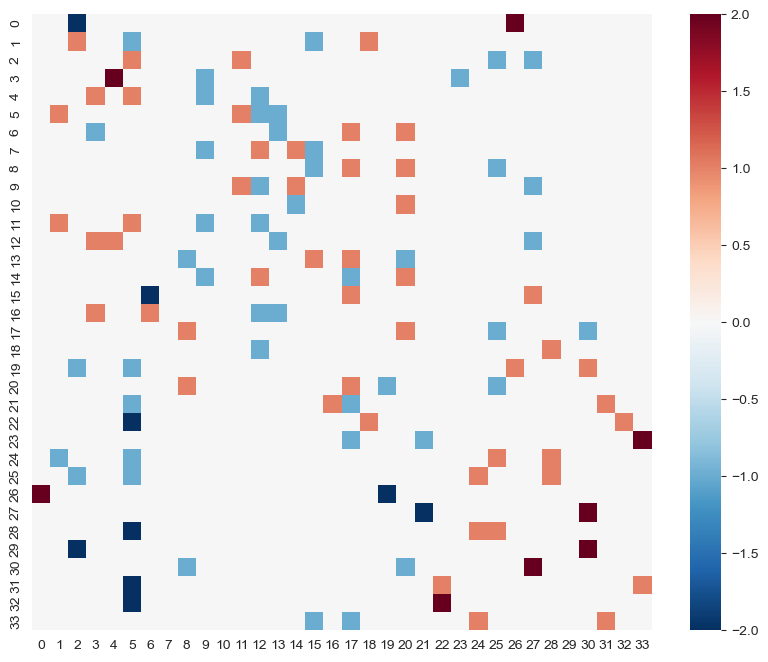

In [35]:
# Visualisasi matriks

plt.figure(figsize=(10, 8))
sns.heatmap(sosiometri_matrix, cmap='RdBu_r')
plt.show()


In [36]:
# Standarisasi data

scaler = StandardScaler()
sosiometri_scaled = scaler.fit_transform(sosiometri_matrix)

/Users/macbook/.conda/envs/pitrArc/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/macbook/.conda/envs/pitrArc/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/macbook/.conda/envs/pitrArc/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/macbook/.conda/envs/pitrArc/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

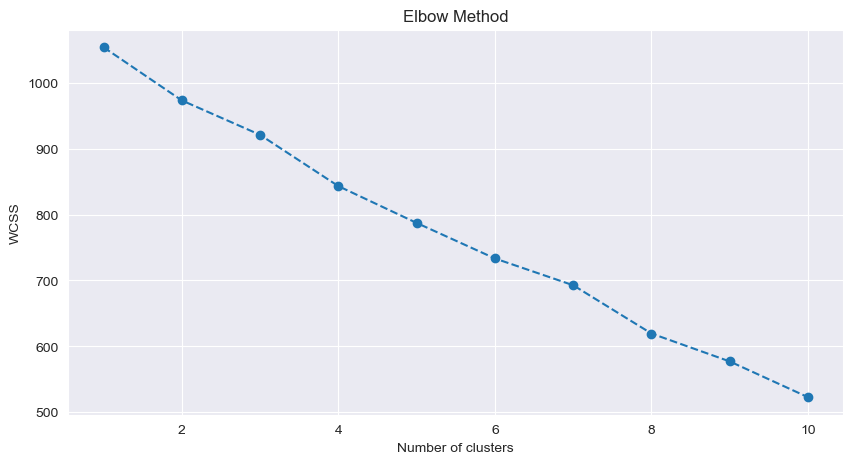

In [37]:
# Menentukan jumlah klaster menggunakan metode Elbow

wcss = [] # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sosiometri_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
# Menerapkan K-Means Clustering

optimal_clusters = 2  # misalkan kita memilih 2 berdasarkan metode elbow

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustered_students = kmeans.fit_predict(sosiometri_scaled)


/Users/macbook/.conda/envs/pitrArc/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
# Menambahkan hasil kluster ke dataframe awal

df['Cluster'] = clustered_students

In [44]:
# Analisis hasil klaster

print(df[df['Cluster'] == 0])  # misalnya, untuk melihat semua siswa di kluster 0


             Timestamp                       Email Address  \
1    5/3/2023 15:20:48         anugrahwidiantari@gmail.com   
2    5/3/2023 17:41:53   idewaketutwidhisandhyka@gmail.com   
3    5/3/2023 17:47:33           madebaskara2020@gmail.com   
4    5/3/2023 19:49:54               pangkywayan@gmail.com   
5   5/16/2023 18:56:55                 putu09ama@gmail.com   
6    6/7/2023 21:17:56      nikomangsulastriasih@gmail.com   
7    5/5/2023 10:33:47  ikadekrehandwipermana265@gmail.com   
8    5/3/2023 20:45:09                   dekyo47@gmail.com   
9    5/4/2023 18:43:15         kadeksuartana1711@gmail.com   
10  5/22/2023 16:55:59            subandikadek19@gmail.com   
11   5/3/2023 17:51:38           komangtrisnaa98@gmail.com   
12   5/3/2023 18:10:26   komangwahyupremanaputra@gmail.com   
14   6/7/2023 21:29:44      nikomangsulastriasih@gmail.com   
16   5/3/2023 18:51:26        wayansivapradiyoga@gmail.com   
17   5/4/2023 18:17:05           wayanyudista135@gmail.com   
18   5/3

In [45]:
# Inisiasi graf berarah

G = nx.DiGraph()

In [47]:
# Tambahkan node ke graf

for idx, row in df.iterrows():
    G.add_node(row['NAMA LENGKAP'], cluster=row['Cluster'])


In [50]:
# Tambahkan edge(hubungan) ke graf

for idx, row in df.iterrows():
    # Teman yang disukai
    if row['1. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda sukai di kelas'], weight=1)

    if row['2. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda sukai di kelas'], weight=1)

    # Teman yang tidak disukai
    if row['1. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)

    if row['2. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)


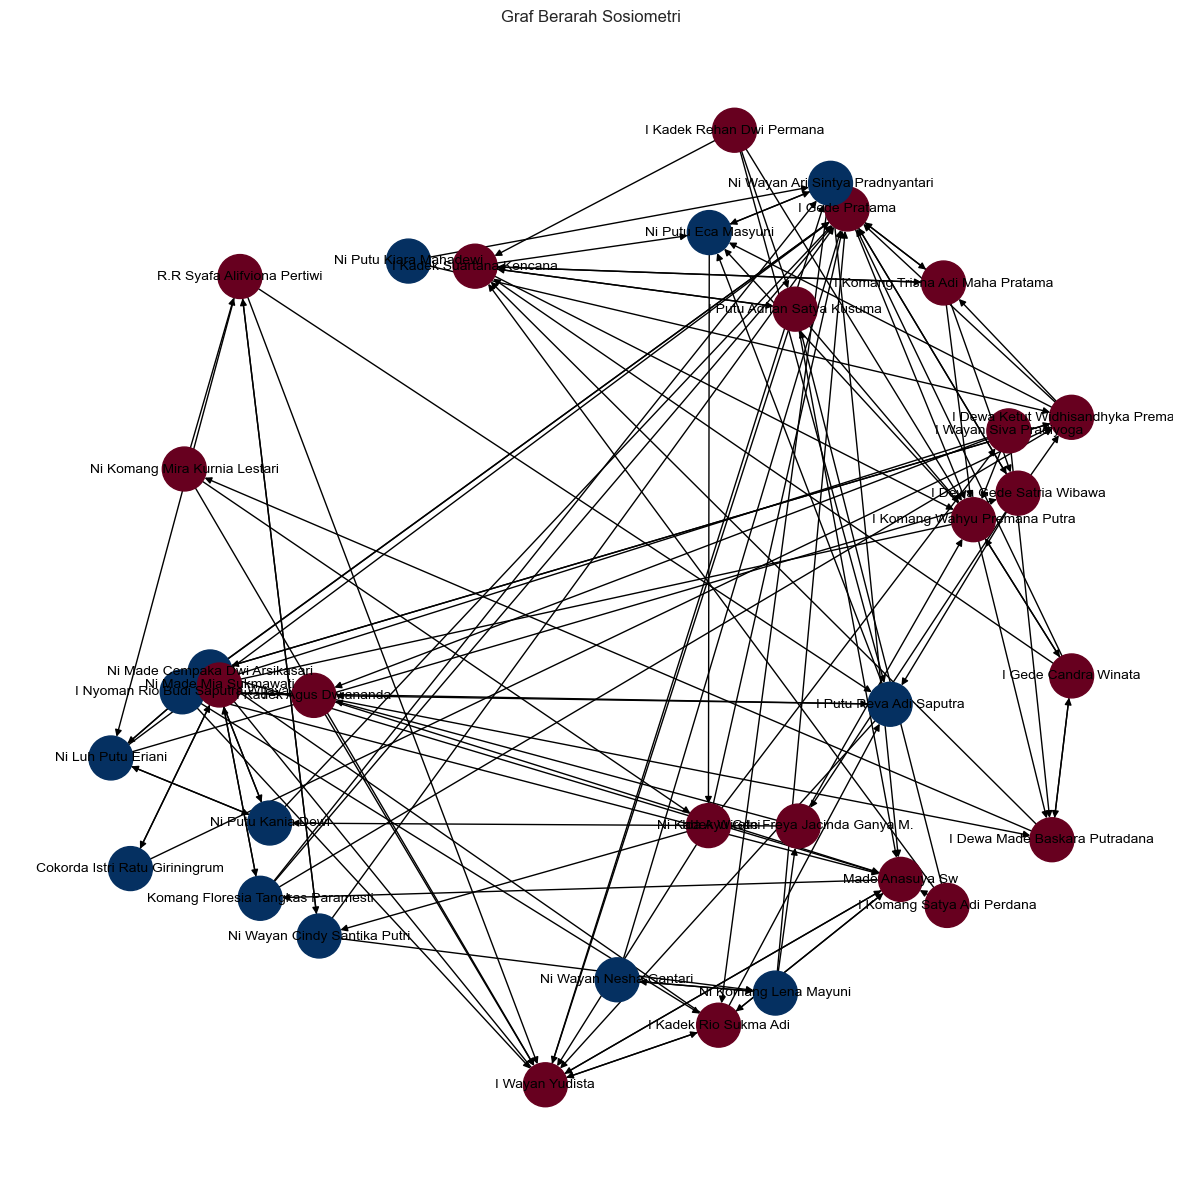

In [52]:
# Visualisasi graf berarah

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(15, 15))

# Pilih warna berdasarkan kluster
colors = [node[1]['cluster'] for node in G.nodes(data=True)]

# Gambar graf pada axis yang diberikan
pos = nx.spring_layout(G)  # Anda bisa mencoba layout lain seperti: shell_layout, circular_layout, etc.
nx.draw(G, pos, ax=ax, with_labels=True, node_color=colors, cmap=plt.cm.RdBu, font_size=10, node_size=1000)

ax.set_title('Graf Berarah Sosiometri')
plt.show()

In [62]:
# Menghitung bobot untuk setiap Node

in_degrees = dict(G.in_degree(weight='weight'))
out_degrees = dict(G.out_degree(weight='weight'))


In [64]:
# Menambahkan bobot ke dataframe

df['in_degree'] = df['NAMA LENGKAP'].map(in_degrees)
df['out_degree'] = df['NAMA LENGKAP'].map(out_degrees)
df['total_degree'] = df['in_degree'] + df['out_degree']


In [65]:
# Analisis bobot

most_mentioned = df.sort_values(by='total_degree', ascending=False).head()
print("Siswa yang Paling Sering Disebutkan:")
print(most_mentioned)

least_mentioned = df.sort_values(by='total_degree').head()
print("\nSiswa yang Paling Jarang Disebutkan:")
print(least_mentioned)


Siswa yang Paling Sering Disebutkan:
            Timestamp                Email Address  \
28  5/5/2023 18:22:22        kaniaputu78@gmail.com   
31  5/6/2023 19:25:24  santikaputricindy@gmail.com   
24  5/3/2023 17:52:38          erixxzenn@gmail.com   
22  5/6/2023 19:43:02        lenamayuni7@gmail.com   
20  5/3/2023 20:48:09           suyak224@gmail.com   

                    NAMA LENGKAP  NO ABSEN KELAS  \
28            Ni Putu Kania Dewi        29  VIIA   
31  Ni Wayan Cindy Santika Putri        32  VIIA   
24            Ni Luh Putu Eriani        25  VIIA   
22         Ni Komang Lena Mayuni        23  VIIA   
20               Made Anasuya Sw        21  VIIA   

   1. Teman anda yang paling anda sukai di kelas  \
28                            Ni Luh Putu Eriani   
31                   R.R Syafa Alifviona Pertiwi   
24                Ni Made Cempaka Dwi Arsikasari   
22            Ida Ayu Gde Freya Jacinda Ganya M.   
20                               I Wayan Yudista   

            

/Users/macbook/.conda/envs/pitrArc/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/macbook/.conda/envs/pitrArc/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:728: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


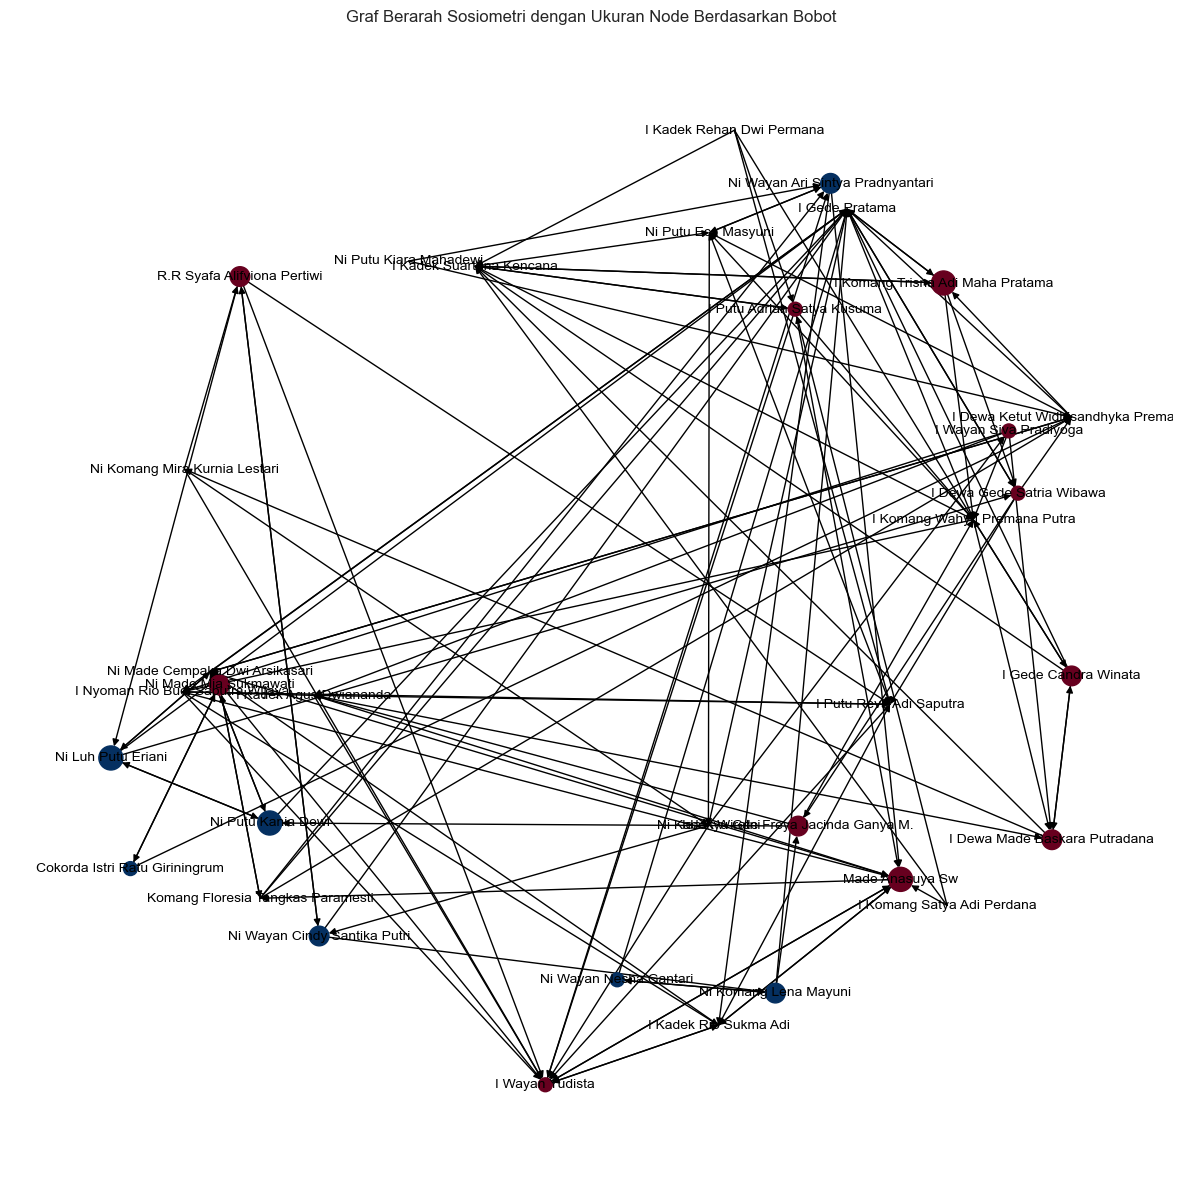

In [67]:
# Visualisasi bobot

node_sizes = [in_degrees[node] * 100 for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 15))
node_sizes = [in_degrees[node] * 100 for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=node_sizes, cmap=plt.cm.RdBu, font_size=10, ax=ax)
ax.set_title('Graf Berarah Sosiometri dengan Ukuran Node Berdasarkan Bobot')
plt.show()


In [68]:
# Implimentasi Algoritma Welch-Powell

def welch_powell(graph):
    color_map = {}
    colors = []

    # Urutkan simpul berdasarkan derajatnya
    nodes_sorted_by_degree = sorted(list(graph.nodes()), key=lambda x: len(list(graph.neighbors(x))), reverse=True)

    for node in nodes_sorted_by_degree:
        available_colors = [True] * len(graph)

        for neighbor in graph.neighbors(node):
            if neighbor in color_map:
                color = color_map[neighbor]
                available_colors[color] = False

        for color, available in enumerate(available_colors):
            if available:
                color_map[node] = color
                if color not in colors:
                    colors.append(color)
                break

    return color_map, len(colors)


In [70]:
# Menerapkan pewarnaan pada graf

color_map, num_colors = welch_powell(G)

colors = [color_map[node] for node in G.nodes()]


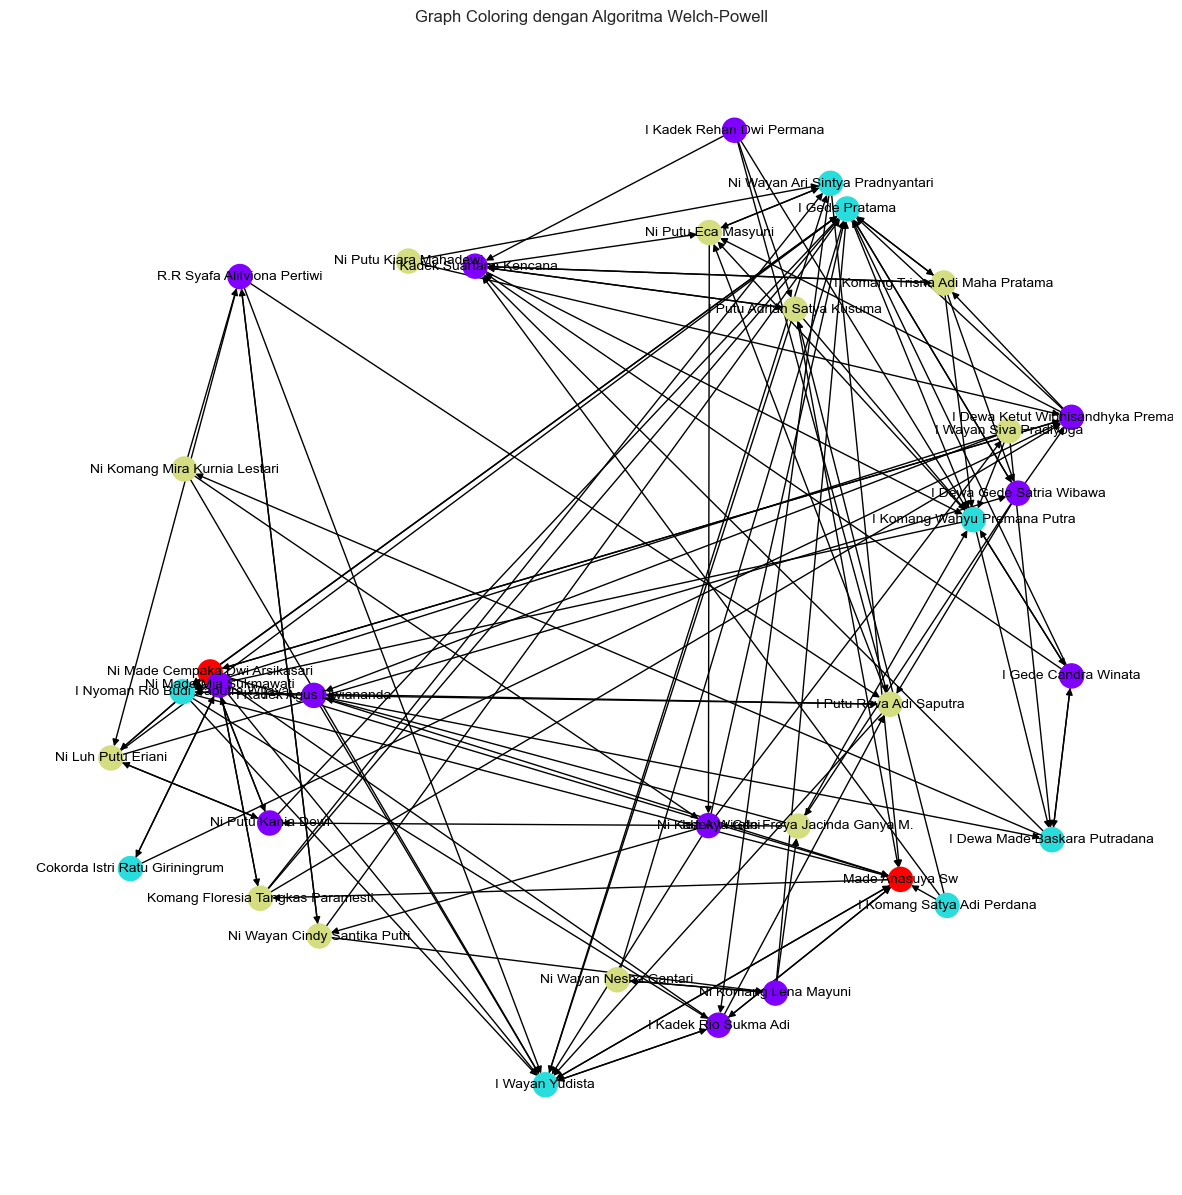

In [71]:
# Visualisasi graf dengan pewarnaan

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, font_size=10, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')
plt.show()


ValueError: Received invalid argument(s): norm

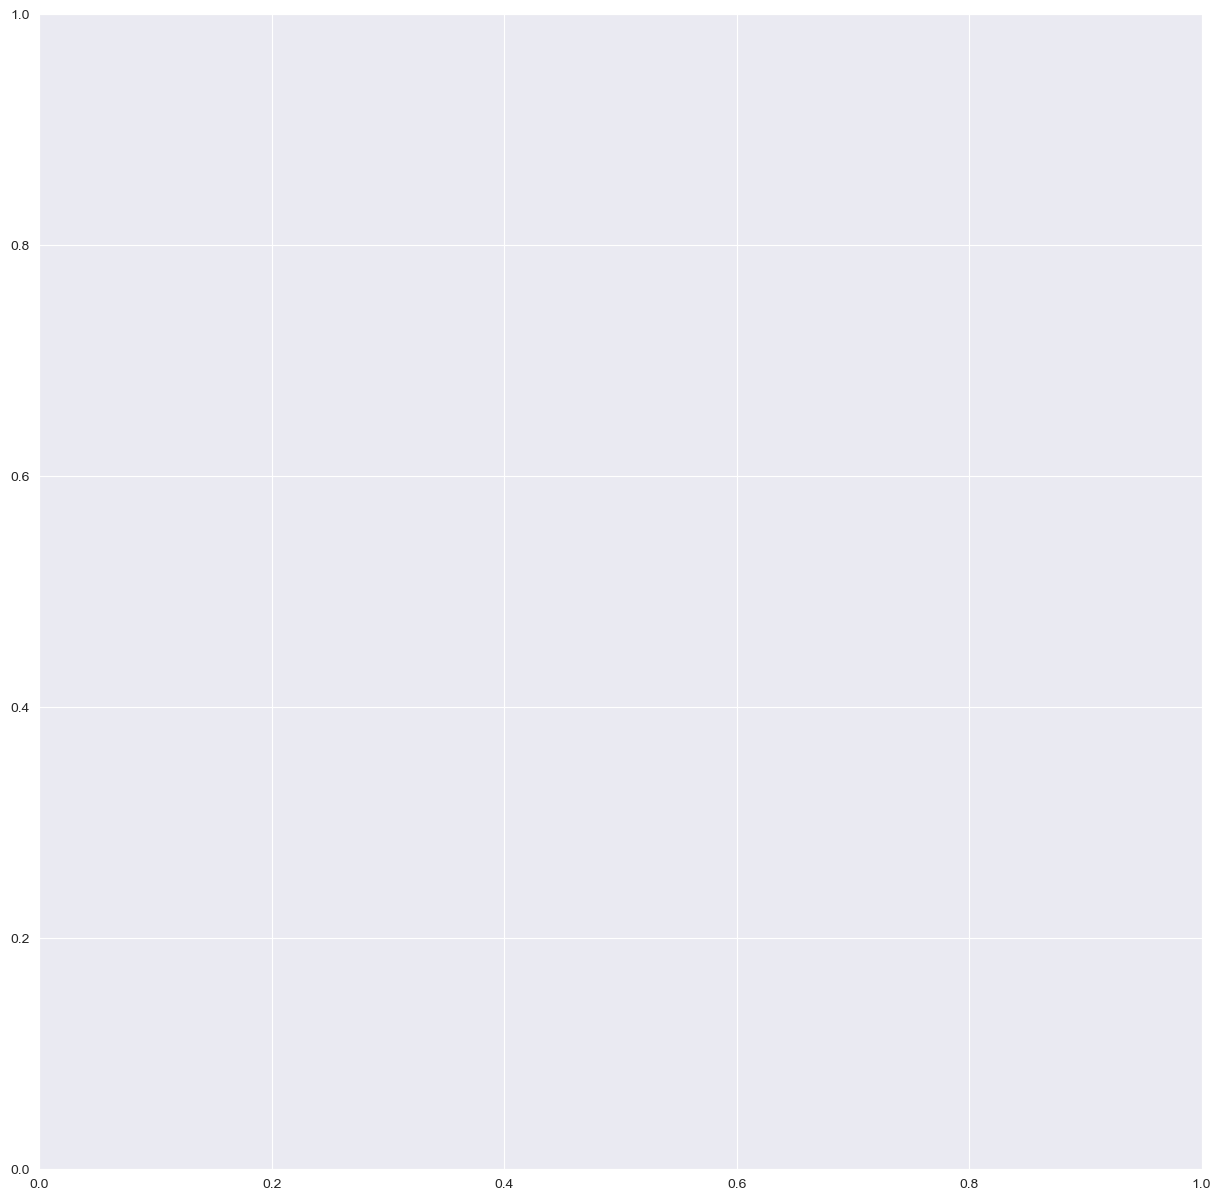

In [74]:
cmap = plt.cm.rainbow
norm = plt.Normalize(0, num_colors-1)

normalized_colors = [cmap(norm(color)) for color in colors]

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=cmap, norm=norm, font_size=10, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')

from matplotlib.patches import Patch

# Membuat legenda berdasarkan pewarnaan yang unik dan mapping warnanya
legend_labels = {color: f'Group {color+1}' for color in set(colors)}
handles = [Patch(color=cmap(norm(color)), label=label) for color, label in legend_labels.items()]

ax.legend(handles=handles, title='Groups')
plt.show()
